# Algoritmo MeanShift

## Link para o notebook principal

[Notebook principal - main.ipynb](./main.ipynb)

## Tabela de Índices

- [Importando Pacotes e Bibliotecas](#importando-os-pacotes-e-bibliotecas)
- [Importando Datasets Tratados](#importando-os-datasets-tratados)
- [Preparando os Hiper-parâmetros](#preparando-os-hiper-parametros)
- [Usando o Algoritmo](#utilizando-o-algoritmo-meanshift)
    - [Iris](#dataset-iris)
    - [Titanic](#dataset-titanic)
    - [Coração](#dataset-heart-disease)
- [Resultados](#visualizando-os-resultados)

## Importando os pacotes e bibliotecas

In [17]:
from sklearn.metrics import silhouette_score, pairwise_distances, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import estimate_bandwidth
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from models import meanshift
from utils import parametros
import seaborn as sns
import pandas as pd
import numpy as np

## Importando os datasets tratados

In [18]:
df_iris_raw = pd.read_csv("./databases/raw/Iris.csv", sep = ",", index_col = "Id")
df_titanic_processed = pd.read_pickle("./databases/processed/titanic_processado.pkl")
df_coracao_processed = pd.read_pickle("./databases/processed/coracao_processado.pkl")

## Preparando os hiper parâmetros

### Separando os **X** e **y** de todos os datasets

In [19]:
min_max_scaler = MinMaxScaler()

X_iris = df_iris_raw.drop(columns = ["Species"]).values
y_iris = df_iris_raw["Species"]

X_titanic = min_max_scaler.fit_transform(df_titanic_processed.drop(columns = ["Survived", "Name"]).values)
y_titanic = df_titanic_processed["Survived"]

X_coracao = min_max_scaler.fit_transform(df_coracao_processed.drop(columns = ["target"]).values)
y_coracao = df_coracao_processed["target"]

### Lendo os hiper-parametros de um arquivo e os salvando em uma classe

In [20]:
hiper_parametros_kmeans = parametros.ParametrosKmeans(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_kmeans.txt")
hiper_parametros_meanshift = parametros.ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt")
hiper_parametros_cmeans = parametros.ParametrosCmeans(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_cmeans.txt")
tamanho_teste = 0.6

## Utilizando o algoritmo Meanshift

### Dataset Iris

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = tamanho_teste, random_state = hiper_parametros_kmeans.getSemente_randomica())

In [22]:
bandwidth = estimate_bandwidth(X_train, quantile = hiper_parametros_meanshift.getQuantil(),
                               n_samples = hiper_parametros_meanshift.getQtd_amostras(),
                               random_state = hiper_parametros_meanshift.getSemente_randomica())

meanShift_iris = meanshift.Meanshift(bandwidth = bandwidth,
                                     sementes = None,
                                     usar_versao_discreta_pontos = hiper_parametros_meanshift.getUsar_versao_discreta_pontos(),
                                     frequencia_minima = hiper_parametros_meanshift.getFrequencia_minima(),
                                     clusterizar_todos_pontos = hiper_parametros_meanshift.getClusterizar_todos_pontos(),
                                     nro_threads = hiper_parametros_meanshift.getNro_threads(),
                                     nro_max_iteracoes = hiper_parametros_meanshift.getNro_max_iteracoes())
meanShift_iris.fit(X_train)

labels_iris = meanShift_iris.getLabels()
centros_iris = meanShift_iris.getCentroides()

#### Visualizando os resultados de forma grafica

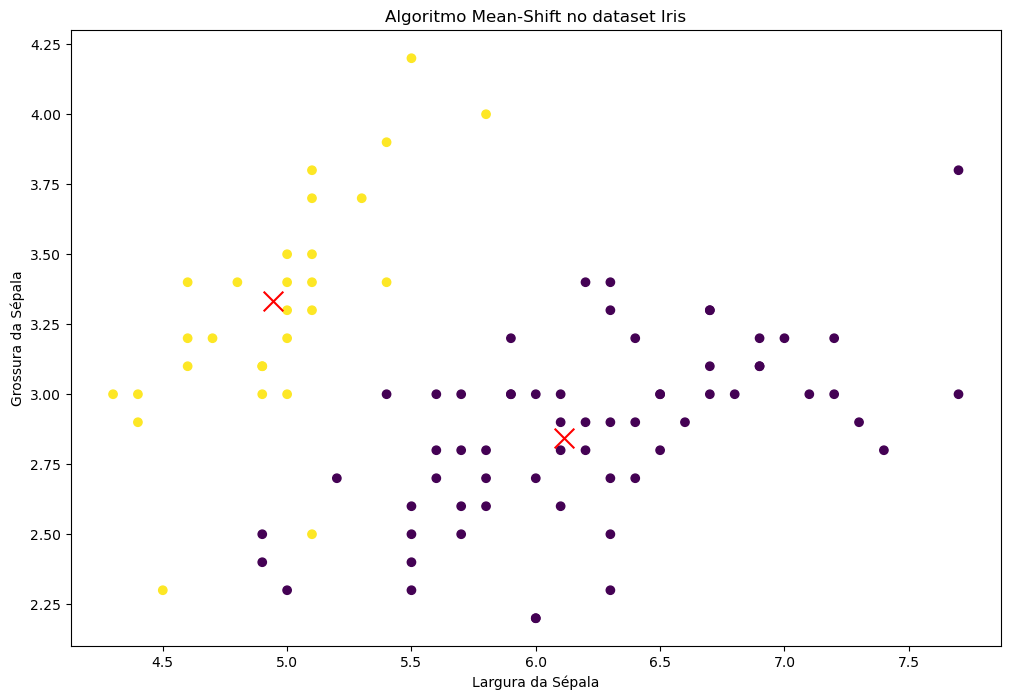

In [23]:
plt.figure(figsize = (12, 8))

plt.scatter(X_train[:, 0], X_train[:, 1], c = labels_iris)
plt.scatter(centros_iris[:, 0], centros_iris[:, 1], marker = "x", color = "red", s = 200)
plt.xlabel("Largura da Sépala")
plt.ylabel("Grossura da Sépala")
plt.title("Algoritmo Mean-Shift no dataset Iris")

plt.show()

##### Avaliação do método - Dataset Iris

In [24]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’

silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(X_train, meanShift_iris.getLabels(), metric = metrica))

davies_bouldin = davies_bouldin_score(X_train, meanShift_iris.getLabels())
print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

SILHOUETTE SCORE:  [0.6629403868825994, 0.9328199420719285, 0.6732430555684342, 0.6629403868825994, 0.6732430555684342, 0.6629403868825994]
DAVIS-BOULDIN SCORE:  0.3974988740319531


### Dataset Titanic

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, train_size = tamanho_teste, random_state = hiper_parametros_kmeans.getSemente_randomica())

In [26]:
bandwidth = estimate_bandwidth(X_train, quantile = hiper_parametros_meanshift.getQuantil(),
                               n_samples = hiper_parametros_meanshift.getQtd_amostras(),
                               random_state = hiper_parametros_meanshift.getSemente_randomica())

meanShift_titanic = meanshift.Meanshift(bandwidth = bandwidth,
                                        sementes = None,
                                        usar_versao_discreta_pontos = hiper_parametros_meanshift.getUsar_versao_discreta_pontos(),
                                        frequencia_minima = hiper_parametros_meanshift.getFrequencia_minima(),
                                        clusterizar_todos_pontos = hiper_parametros_meanshift.getClusterizar_todos_pontos(),
                                        nro_threads = hiper_parametros_meanshift.getNro_threads(),
                                        nro_max_iteracoes = hiper_parametros_meanshift.getNro_max_iteracoes())
meanShift_titanic.fit(X_train)

labels_titanic = meanShift_titanic.getLabels()
centros_titanic = meanShift_titanic.getCentroides()

#### Visualizando os resultados de forma grafica

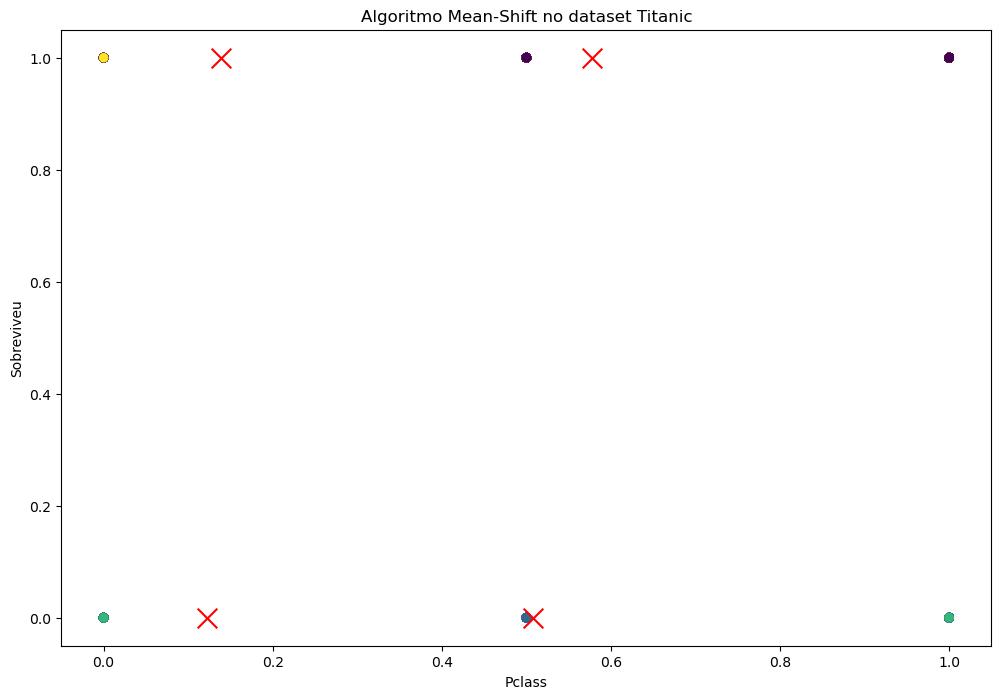

In [27]:
plt.figure(figsize = (12, 8))

plt.scatter(X_train[:, 0], X_train[:, 1], c = labels_titanic)
plt.scatter(centros_titanic[:, 0], centros_titanic[:, 1], marker = "x", color = "red", s = 200)
plt.xlabel("Pclass")
plt.ylabel("Sobreviveu")
plt.title("Algoritmo Mean-Shift no dataset Titanic")

plt.show()

##### Avaliação do método - Dataset Titanic

In [28]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’

silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(X_train, meanShift_titanic.getLabels(), metric = metrica))

davies_bouldin = davies_bouldin_score(X_train, meanShift_titanic.getLabels())
print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

SILHOUETTE SCORE:  [0.5173781014456997, 0.6414610576923413, 0.4886574701949665, 0.5173781014456997, 0.4886574701949665, 0.5173781014456997]
DAVIS-BOULDIN SCORE:  0.8719844958125793


### Dataset Heart Disease

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_coracao, y_coracao, train_size = tamanho_teste, random_state = hiper_parametros_kmeans.getSemente_randomica())

In [30]:
bandwidth = estimate_bandwidth(X_train, quantile = hiper_parametros_meanshift.getQuantil(),
                               n_samples = hiper_parametros_meanshift.getQtd_amostras(),
                               random_state = hiper_parametros_meanshift.getSemente_randomica())

meanShift_coracao = meanshift.Meanshift(bandwidth = bandwidth,
                                        sementes = None,
                                        usar_versao_discreta_pontos = hiper_parametros_meanshift.getUsar_versao_discreta_pontos(),
                                        frequencia_minima = hiper_parametros_meanshift.getFrequencia_minima(),
                                        clusterizar_todos_pontos = hiper_parametros_meanshift.getClusterizar_todos_pontos(),
                                        nro_threads = hiper_parametros_meanshift.getNro_threads(),
                                        nro_max_iteracoes = hiper_parametros_meanshift.getNro_max_iteracoes())
meanShift_coracao.fit(X_train)

labels_coracao = meanShift_coracao.getLabels()
centros_coracao = meanShift_coracao.getCentroides()

#### Visualizando os resultados de forma grafica

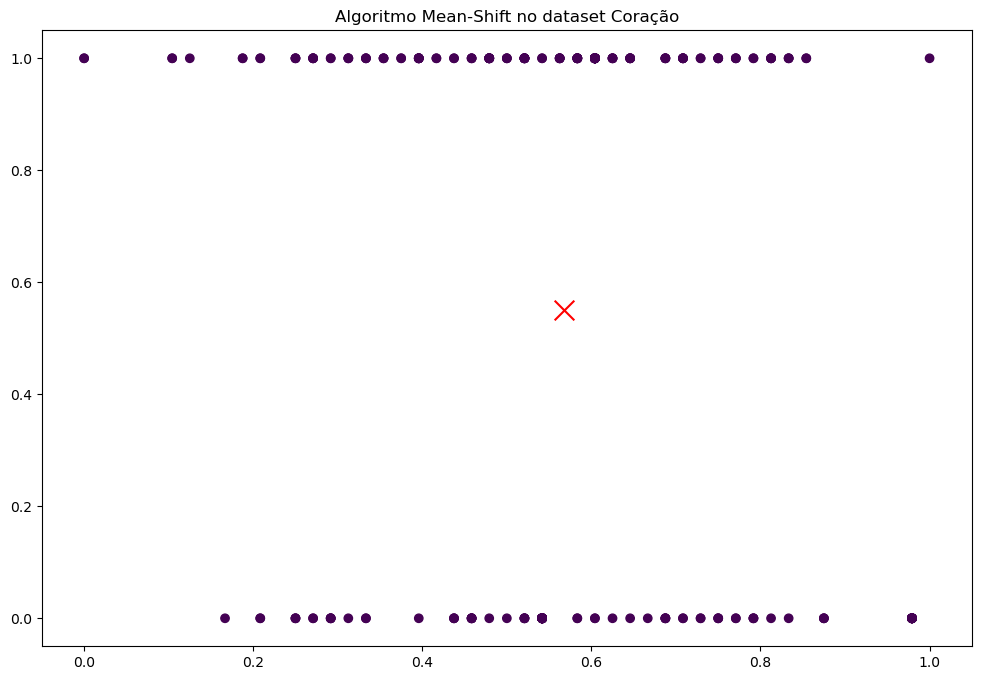

In [31]:
plt.figure(figsize = (12, 8))

plt.scatter(X_train[:, 0], X_train[:, 1], c = labels_coracao)
plt.scatter(centros_coracao[:, 0], centros_coracao[:, 1], marker = "x", color = "red", s = 200)
plt.title("Algoritmo Mean-Shift no dataset Coração")

plt.show()

##### Avaliação do método - Dataset Coração

In [35]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’

print("Não foi possível realizar nenhuma avaliação neste método, pois o algoritmo julga ter apenas 1 cluster")

Não foi possível realizar nenhuma avaliação neste método, pois o algoritmo julga ter apenas 1 cluster


### Visualizando os Resultados

In [ ]:
print(f"Quantidade de labels [iris]\t= {len(centros_iris)}", end = "\n")
print(f"Quantidade de labels [titanic]\t= {len(centros_titanic)}", end = "\n")
print(f"Quantidade de labels [coração]\t= {len(centros_coracao)}", end = "\n")